In [1]:
## Import libraries

In [2]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(scales)
library(stringr)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
# It is important to emphasize that some samples do not have timestamps because it is not provided 
# for 'scheduled' status. But, I dont know its reason.

In [4]:
df_log <- read.csv(file = 'events.csv', sep = ',', stringsAsFactors = FALSE)
#df_log$creation_timestamp <- as.POSIXct(df_log$creation_timestamp, origin="1970-01-01")
df_log$creation_timestamp <- as.POSIXct(df_log$creation_timestamp,format='%Y-%m-%dT%H:%M:%SZ', tzone = "UTC")
df_log$timestamp <- ymd_hms(df_log$creation_timestamp) + hours(2)
df_log$timestamp[is.na(df_log$timestamp)] <- Inf

df_log <- df_log %>%
  #arrange(creation_timestamp) %>%
  group_by(uid) %>%
  mutate(min_timestamp = min(timestamp)) %>%
  ungroup()
summary(df_log)
str(df_log)
head(df_log)

     uid                name           function_name     
 Length:125         Length:125         Length:125        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
 creation_timestamp            first_timestamp    last_timestamp    
 Min.   :2021-10-02 21:14:29   Length:125         Length:125        
 1st Qu.:2021-10-02 21:30:05   Class :character   Class :character  
 Median :2021-10-02 21:34:11   Mode  :character   Mode  :character  
 Mean   :2021-10-02 21:35:50                                        
 3rd Qu.:2021-10-02 21:42:05                                        
 Max.   :2021-10-02 21:55:37                                        
    reason              node             message         
 Length:125         Length:125         Length:125    

tibble [125 × 11] (S3: tbl_df/tbl/data.frame)
 $ uid               : chr [1:125] "9a86a659-69dd-403d-aa78-642dc91caa69" "9a86a659-69dd-403d-aa78-642dc91caa69" "9a86a659-69dd-403d-aa78-642dc91caa69" "6a658663-db88-4d74-a255-68b0fec11733" ...
 $ name              : chr [1:125] "wskow-invoker-00-4-guest-imageprocessing-1" "wskow-invoker-00-4-guest-imageprocessing-1" "wskow-invoker-00-4-guest-imageprocessing-1" "wskow-invoker-00-5-guest-imageprocessing-2" ...
 $ function_name     : chr [1:125] "imageprocessing_1" "imageprocessing_1" "imageprocessing_1" "imageprocessing_2" ...
 $ creation_timestamp: POSIXct[1:125], format: "2021-10-02 21:14:29" "2021-10-02 21:14:30" ...
 $ first_timestamp   : chr [1:125] "" "2021-10-02T21:14:30Z" "2021-10-02T21:15:28Z" "" ...
 $ last_timestamp    : chr [1:125] "" "2021-10-02T21:14:30Z" "2021-10-02T21:15:28Z" "" ...
 $ reason            : chr [1:125] "Scheduled" "Pulling" "Pulled" "Scheduled" ...
 $ node              : chr [1:125] "paravance-16.rennes.grid50

uid                                 
1 9a86a659-69dd-403d-aa78-642dc91caa69
2 9a86a659-69dd-403d-aa78-642dc91caa69
3 9a86a659-69dd-403d-aa78-642dc91caa69
4 6a658663-db88-4d74-a255-68b0fec11733
5 9a86a659-69dd-403d-aa78-642dc91caa69
6 6a658663-db88-4d74-a255-68b0fec11733
  name                                       function_name    
1 wskow-invoker-00-4-guest-imageprocessing-1 imageprocessing_1
2 wskow-invoker-00-4-guest-imageprocessing-1 imageprocessing_1
3 wskow-invoker-00-4-guest-imageprocessing-1 imageprocessing_1
4 wskow-invoker-00-5-guest-imageprocessing-2 imageprocessing_2
5 wskow-invoker-00-4-guest-imageprocessing-1 imageprocessing_1
6 wskow-invoker-00-5-guest-imageprocessing-2 imageprocessing_2
  creation_timestamp  first_timestamp      last_timestamp       reason   
1 2021-10-02 21:14:29                                           Scheduled
2 2021-10-02 21:14:30 2021-10-02T21:14:30Z 2021-10-02T21:14:30Z Pulling  
3 2021-10-02 21:15:28 2021-10-02T21:15:28Z 2021-10-02T21:15:28Z Pulled   
4 2021-10-02 21:15:32                                           Scheduled
5 2021-10-02 21:15:51 2021-10-02T21:15:51Z 2021-10-02T21:15:51Z Created  
6 2021-10-02 21:15:51 2021-10-02T21:15:51Z 2021-10-02T21:15:51Z Pulled   
  node                           
1 paravance-16.rennes.grid5000.fr
2 paravance-16.rennes.grid5000.fr
3 paravance-16.rennes.grid5000.fr
4 paravance-16.rennes.grid5000.fr
5 paravance-16.rennes.grid5000.fr
6 paravance-16.rennes.grid5000.fr
  message                                                                                                      
1 Successfully assigned openwhisk/wskow-invoker-00-4-guest-imageprocessing-1 to paravance-16.rennes.grid5000.fr
2 Pulling image "andersonandrei/python3action:image_processing"                                                
3 Successfully pulled image "andersonandrei/python3action:image_processing" in 58.002606535s                   
4 Successfully assigned openwhisk/wskow-invoker-00-5-guest-imageprocessing-2 to paravance-16.rennes.grid5000.fr
5 Created container user-action                                                                                
6 Container image "andersonandrei/python3action:image_processing" already present on machine                   
  timestamp           min_timestamp      
1 2021-10-02 23:14:29 2021-10-02 23:14:29
2 2021-10-02 23:14:30 2021-10-02 23:14:29
3 2021-10-02 23:15:28 2021-10-02 23:14:29
4 2021-10-02 23:15:32 2021-10-02 23:15:32
5 2021-10-02 23:15:51 2021-10-02 23:14:29
6 2021-10-02 23:15:51 2021-10-02 23:15:32

In [5]:
df_activations <- read.csv(file = 'activations.csv', sep = ',', stringsAsFactors = FALSE)
df_activations$timestamp <- ymd_hms(as.POSIXct(df_activations$timestamp, origin="1970-01-01"))
summary(df_activations)
str(df_activations)

  object_uid        object_name        function_name         duration        
 Length:100         Length:100         Length:100         Min.   :  0.07775  
 Class :character   Class :character   Class :character   1st Qu.:  0.11892  
 Mode  :character   Mode  :character   Mode  :character   Median :  9.79143  
                                                          Mean   : 65.92790  
                                                          3rd Qu.:146.74402  
                                                          Max.   :211.90215  
                                                          NA's   :57         
   timestamp                      reason          metadata_value    
 Min.   :2021-10-02 23:15:53   Length:100         Length:100        
 1st Qu.:2021-10-02 23:33:41   Class :character   Class :character  
 Median :2021-10-02 23:36:45   Mode  :character   Mode  :character  
 Mean   :2021-10-02 23:35:50                                        
 3rd Qu.:2021-10-02 23:42:08   

'data.frame':	100 obs. of  10 variables:
 $ object_uid          : chr  "639957c6e1474f639957c6e1479f63ab" "639957c6e1474f639957c6e1479f63ab" "639957c6e1474f639957c6e1479f63ab" "639957c6e1474f639957c6e1479f63ab" ...
 $ object_name         : chr  "floatoperation_2" "floatoperation_2" "floatoperation_2" "floatoperation_2" ...
 $ function_name       : chr  "floatoperation_2" "floatoperation_2" "floatoperation_2" "floatoperation_2" ...
 $ duration            : num  63.1 NA NA NA 63.6 ...
 $ timestamp           : POSIXct, format: NA NA ...
 $ reason              : chr  "function_execution" "" "finishing_time" "starting_time" ...
 $ metadata_value      : chr  "" "100000000" "" "" ...
 $ metadata_description: chr  "" "metadata_input" "" "" ...
 $ node                : logi  NA NA NA NA NA NA ...
 $ message             : logi  NA NA NA NA NA NA ...


In [6]:
####################################

In [7]:
# Timestamp analysis

In [8]:
####################################

In [9]:
### Filter the events file

In [10]:
df_filtered <- df_log %>%
    filter(
      reason == 'Scheduled' |
      reason == 'Pulling' |
      reason == 'Pulled' |
      reason == 'Created' |
      reason == 'Started' |
      reason == 'Killing')

df_selected <- df_filtered %>%
    select(-name, -uid, -message, -min_timestamp, -first_timestamp, -last_timestamp, -creation_timestamp)
summary(df_selected)

 function_name         reason              node          
 Length:125         Length:125         Length:125        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
   timestamp                  
 Min.   :2021-10-02 23:14:29  
 1st Qu.:2021-10-02 23:30:05  
 Median :2021-10-02 23:34:11  
 Mean   :2021-10-02 23:35:50  
 3rd Qu.:2021-10-02 23:42:05  
 Max.   :2021-10-02 23:55:37  

In [11]:
### Process the events durations

In [12]:
df_spread <- df_selected %>%
    group_by_at(vars(-timestamp)) %>%
    mutate(sample_id = row_number()) %>% ungroup() %>%
    spread(reason, timestamp) %>%
    select(-sample_id) #%>%

print(df_spread)
df_processed <- df_spread

# A tibble: 32 x 8
   function_name    node                 Created             Killing            
   <chr>            <chr>                <dttm>              <dttm>             
 1 floatoperation_1 paravance-11.rennes… 2021-10-02 23:42:17 2021-10-02 23:53:22
 2 floatoperation_1 paravance-11.rennes… NA                  2021-10-02 23:53:22
 3 floatoperation_2 paravance-11.rennes… 2021-10-02 23:42:17 2021-10-02 23:53:22
 4 floatoperation_2 paravance-11.rennes… NA                  2021-10-02 23:53:22
 5 imageprocessing… paravance-16.rennes… 2021-10-02 23:15:51 2021-10-02 23:34:09
 6 imageprocessing… paravance-16.rennes… 2021-10-02 23:30:01 2021-10-02 23:34:09
 7 imageprocessing… paravance-16.rennes… 2021-10-02 23:34:07 2021-10-02 23:39:03
 8 imageprocessing… paravance-16.rennes… 2021-10-02 23:42:06 2021-10-02 23:52:54
 9 imageprocessing… paravance-16.rennes… NA                  2021-10-02 23:52:54
10 imageprocessing… paravance-16.rennes… 2021-10-02 23:15:52 2021-10-02 23:26:38
# … with 

In [13]:
### Filter the activations file

In [14]:
df_activations_selected <- df_activations %>%
    select(
        function_name,
        timestamp,
        reason,
        node,
        object_uid) %>%
    drop_na(timestamp)
        #mutate(duration = (duration / 1000) %% 60)
summary(df_activations_selected)

 function_name        timestamp                      reason         
 Length:38          Min.   :2021-10-02 23:15:53   Length:38         
 Class :character   1st Qu.:2021-10-02 23:33:41   Class :character  
 Mode  :character   Median :2021-10-02 23:36:45   Mode  :character  
                    Mean   :2021-10-02 23:35:50                     
                    3rd Qu.:2021-10-02 23:42:08                     
                    Max.   :2021-10-02 23:45:37                     
   node          object_uid       
 Mode:logical   Length:38         
 NA's:38        Class :character  
                Mode  :character  
                                  
                                  
                                  

In [15]:
### First view of activations

In [16]:
head(df_activations_selected)

function_name    timestamp           reason         node
1 floatoperation_2 2021-10-02 23:43:21 finishing_time NA  
2 floatoperation_2 2021-10-02 23:42:18 starting_time  NA  
3 floatoperation_1 2021-10-02 23:43:22 finishing_time NA  
4 floatoperation_1 2021-10-02 23:42:18 starting_time  NA  
5 matmul_3         2021-10-02 23:45:37 finishing_time NA  
6 matmul_3         2021-10-02 23:42:09 starting_time  NA  
  object_uid                      
1 639957c6e1474f639957c6e1479f63ab
2 639957c6e1474f639957c6e1479f63ab
3 0e86cd2c96964fa286cd2c96962fa2d9
4 0e86cd2c96964fa286cd2c96962fa2d9
5 aae9022a2dd84342a9022a2dd863421a
6 aae9022a2dd84342a9022a2dd863421a

function_name    timestamp           reason         node
1 floatoperation_2 2021-10-02 23:43:21 finishing_time NA  
2 floatoperation_2 2021-10-02 23:42:18 starting_time  NA  
3 floatoperation_1 2021-10-02 23:43:22 finishing_time NA  
4 floatoperation_1 2021-10-02 23:42:18 starting_time  NA  
5 matmul_3         2021-10-02 23:45:37 finishing_time NA  
6 matmul_3         2021-10-02 23:42:09 starting_time  NA  
  object_uid                      
1 639957c6e1474f639957c6e1479f63ab
2 639957c6e1474f639957c6e1479f63ab
3 0e86cd2c96964fa286cd2c96962fa2d9
4 0e86cd2c96964fa286cd2c96962fa2d9
5 aae9022a2dd84342a9022a2dd863421a
6 aae9022a2dd84342a9022a2dd863421a

Saving 6.67 x 6.67 in image



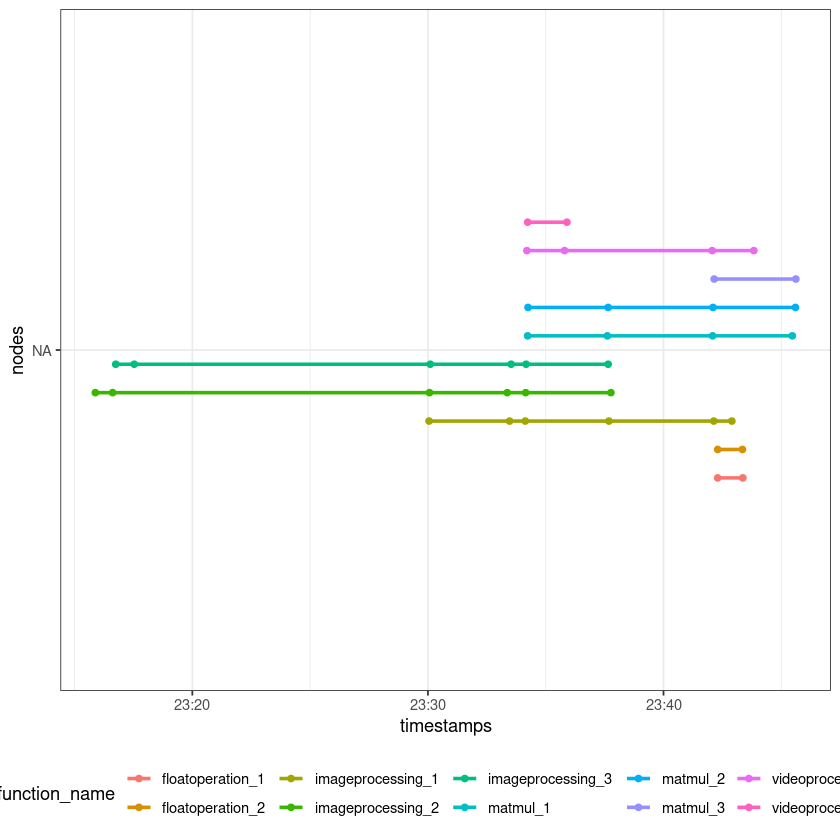

In [17]:
df_plot <- df_activations_selected #%>% drop_na(timestamp)
head(df_plot)
ggplot(data = df_plot, aes(x = node, 
                           #y = as.POSIXct(timestamp, origin = "1970-01-01"), 
                           y = timestamp,
                           color = function_name,
                           #shape = reason,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.5)) + 
    geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +

labs(x = "nodes", y = "timestamps", color = "function_name") +
   scale_fill_brewer(palette = "Dark2") +
   theme_bw() +
   theme(legend.position="bottom") +
   ggsave('full_line_plot_filtered.png')

In [18]:
### Spread the timestamps of activations by categories

In [19]:
df_activations_selected <- df_activations %>%
    select(
       function_name,
       timestamp,
       reason) %>%
    drop_na()
    #mutate(duration = (duration / 1000) %% 60)
summary(df_activations_selected)

df_spread_activations <- df_activations_selected %>%
   group_by_at(vars(-timestamp)) %>%
   mutate(sample_id = row_number()) %>% ungroup() %>%
   spread(reason, timestamp) %>%
   select(-sample_id)

head(df_spread_activations)
tail(df_spread_activations)

 function_name        timestamp                      reason         
 Length:38          Min.   :2021-10-02 23:15:53   Length:38         
 Class :character   1st Qu.:2021-10-02 23:33:41   Class :character  
 Mode  :character   Median :2021-10-02 23:36:45   Mode  :character  
                    Mean   :2021-10-02 23:35:50                     
                    3rd Qu.:2021-10-02 23:42:08                     
                    Max.   :2021-10-02 23:45:37                     

function_name     finishing_time      starting_time      
1 floatoperation_1  2021-10-02 23:43:22 2021-10-02 23:42:18
2 floatoperation_2  2021-10-02 23:43:21 2021-10-02 23:42:18
3 imageprocessing_1 2021-10-02 23:42:54 2021-10-02 23:42:08
4 imageprocessing_1 2021-10-02 23:37:41 2021-10-02 23:34:08
5 imageprocessing_1 2021-10-02 23:33:28 2021-10-02 23:30:03
6 imageprocessing_2 2021-10-02 23:37:46 2021-10-02 23:34:09

function_name     finishing_time      starting_time      
1 matmul_2          2021-10-02 23:45:36 2021-10-02 23:42:06
2 matmul_2          2021-10-02 23:37:39 2021-10-02 23:34:15
3 matmul_3          2021-10-02 23:45:37 2021-10-02 23:42:09
4 videoprocessing_1 2021-10-02 23:43:50 2021-10-02 23:42:04
5 videoprocessing_1 2021-10-02 23:35:48 2021-10-02 23:34:12
6 videoprocessing_2 2021-10-02 23:35:54 2021-10-02 23:34:14

In [20]:
### Merge the activations and events data

In [21]:
df_events_to_join <- df_processed #%>% mutate(id = row_number())
head(df_events_to_join)
df_activations_to_join <- df_spread_activations #%>% mutate(id = row_number())
head(df_activations_to_join)

df_all <- full_join(
   df_events_to_join,
   df_activations_to_join,
   by="function_name") #%>%
   #distinct()
#df_all[is.na(df_all)] = 0
summary(df_all)

df_gathered <- df_all %>%
    gather(
        factor_key = 'TRUE',
        key = 'reason',
        value = 'timestamp',
        -function_name, -node) 

df_gathered$reason <- str_replace_all(df_gathered$reason, 'Scheduled', '00_pod_scheduled')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Pulling', '01_container_pulling')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Pulled', '02_container_pulled')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Created', '03_container_created')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Started', '04_container_started')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'starting_time', '05_function_started')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'finishing_time', '06_function_finished')
df_gathered$reason <- str_replace_all(df_gathered$reason, 'Killing', '07_finishing_container')

head(df_gathered)
summary(df_gathered)

function_name     node                            Created            
1 floatoperation_1  paravance-11.rennes.grid5000.fr 2021-10-02 23:42:17
2 floatoperation_1  paravance-11.rennes.grid5000.fr <NA>               
3 floatoperation_2  paravance-11.rennes.grid5000.fr 2021-10-02 23:42:17
4 floatoperation_2  paravance-11.rennes.grid5000.fr <NA>               
5 imageprocessing_1 paravance-16.rennes.grid5000.fr 2021-10-02 23:15:51
6 imageprocessing_1 paravance-16.rennes.grid5000.fr 2021-10-02 23:30:01
  Killing             Pulled              Pulling            
1 2021-10-02 23:53:22 2021-10-02 23:42:14 2021-10-02 23:42:07
2 2021-10-02 23:53:22 <NA>                <NA>               
3 2021-10-02 23:53:22 2021-10-02 23:42:15 2021-10-02 23:42:08
4 2021-10-02 23:53:22 <NA>                <NA>               
5 2021-10-02 23:34:09 2021-10-02 23:15:28 2021-10-02 23:14:30
6 2021-10-02 23:34:09 2021-10-02 23:30:00 <NA>               
  Scheduled           Started            
1 2021-10-02 23:42:06 2021-10-02 23:42:17
2 <NA>                <NA>               
3 2021-10-02 23:42:07 2021-10-02 23:42:17
4 <NA>                <NA>               
5 2021-10-02 23:14:29 2021-10-02 23:30:01
6 2021-10-02 23:29:59 2021-10-02 23:34:07

function_name     finishing_time      starting_time      
1 floatoperation_1  2021-10-02 23:43:22 2021-10-02 23:42:18
2 floatoperation_2  2021-10-02 23:43:21 2021-10-02 23:42:18
3 imageprocessing_1 2021-10-02 23:42:54 2021-10-02 23:42:08
4 imageprocessing_1 2021-10-02 23:37:41 2021-10-02 23:34:08
5 imageprocessing_1 2021-10-02 23:33:28 2021-10-02 23:30:03
6 imageprocessing_2 2021-10-02 23:37:46 2021-10-02 23:34:09

 function_name          node              Created                   
 Length:70          Length:70          Min.   :2021-10-02 23:15:51  
 Class :character   Class :character   1st Qu.:2021-10-02 23:30:01  
 Mode  :character   Mode  :character   Median :2021-10-02 23:34:08  
                                       Mean   :2021-10-02 23:31:54  
                                       3rd Qu.:2021-10-02 23:40:04  
                                       Max.   :2021-10-02 23:42:17  
                                       NA's   :24                   
    Killing                        Pulled                   
 Min.   :2021-10-02 23:26:38   Min.   :2021-10-02 23:15:28  
 1st Qu.:2021-10-02 23:34:10   1st Qu.:2021-10-02 23:30:02  
 Median :2021-10-02 23:39:40   Median :2021-10-02 23:34:06  
 Mean   :2021-10-02 23:41:43   Mean   :2021-10-02 23:31:50  
 3rd Qu.:2021-10-02 23:53:22   3rd Qu.:2021-10-02 23:34:13  
 Max.   :2021-10-02 23:55:37   Max.   :2021-10-02 23:42:15  
 NA's   :3           

function_name     node                            reason              
1 floatoperation_1  paravance-11.rennes.grid5000.fr 03_container_created
2 floatoperation_1  paravance-11.rennes.grid5000.fr 03_container_created
3 floatoperation_2  paravance-11.rennes.grid5000.fr 03_container_created
4 floatoperation_2  paravance-11.rennes.grid5000.fr 03_container_created
5 imageprocessing_1 paravance-16.rennes.grid5000.fr 03_container_created
6 imageprocessing_1 paravance-16.rennes.grid5000.fr 03_container_created
  timestamp          
1 2021-10-02 23:42:17
2 <NA>               
3 2021-10-02 23:42:17
4 <NA>               
5 2021-10-02 23:15:51
6 2021-10-02 23:15:51

 function_name          node              reason         
 Length:560         Length:560         Length:560        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
                                                         
   timestamp                  
 Min.   :2021-10-02 23:14:29  
 1st Qu.:2021-10-02 23:30:04  
 Median :2021-10-02 23:34:10  
 Mean   :2021-10-02 23:34:16  
 3rd Qu.:2021-10-02 23:42:03  
 Max.   :2021-10-02 23:55:37  
 NA's   :143                  

In [22]:
df_plot <- df_gathered
summary(df_plot)


df_plot <- df_gathered %>% drop_na(timestamp)
summary(df_plot)
head(df_plot)
tail(df_plot)
print(df_plot)

 function_name          node              reason         
 Length:560         Length:560         Length:560        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
                                                         
   timestamp                  
 Min.   :2021-10-02 23:14:29  
 1st Qu.:2021-10-02 23:30:04  
 Median :2021-10-02 23:34:10  
 Mean   :2021-10-02 23:34:16  
 3rd Qu.:2021-10-02 23:42:03  
 Max.   :2021-10-02 23:55:37  
 NA's   :143                  

 function_name          node              reason         
 Length:417         Length:417         Length:417        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
   timestamp                  
 Min.   :2021-10-02 23:14:29  
 1st Qu.:2021-10-02 23:30:04  
 Median :2021-10-02 23:34:10  
 Mean   :2021-10-02 23:34:16  
 3rd Qu.:2021-10-02 23:42:03  
 Max.   :2021-10-02 23:55:37  

function_name     node                            reason              
1 floatoperation_1  paravance-11.rennes.grid5000.fr 03_container_created
2 floatoperation_2  paravance-11.rennes.grid5000.fr 03_container_created
3 imageprocessing_1 paravance-16.rennes.grid5000.fr 03_container_created
4 imageprocessing_1 paravance-16.rennes.grid5000.fr 03_container_created
5 imageprocessing_1 paravance-16.rennes.grid5000.fr 03_container_created
6 imageprocessing_1 paravance-16.rennes.grid5000.fr 03_container_created
  timestamp          
1 2021-10-02 23:42:17
2 2021-10-02 23:42:17
3 2021-10-02 23:15:51
4 2021-10-02 23:15:51
5 2021-10-02 23:15:51
6 2021-10-02 23:30:01

function_name     node                            reason             
1 videoprocessing_1 paravance-19.rennes.grid5000.fr 05_function_started
2 videoprocessing_1 paravance-19.rennes.grid5000.fr 05_function_started
3 videoprocessing_1 paravance-19.rennes.grid5000.fr 05_function_started
4 videoprocessing_1 paravance-19.rennes.grid5000.fr 05_function_started
5 videoprocessing_2 paravance-11.rennes.grid5000.fr 05_function_started
6 videoprocessing_2 paravance-11.rennes.grid5000.fr 05_function_started
  timestamp          
1 2021-10-02 23:42:04
2 2021-10-02 23:34:12
3 2021-10-02 23:42:04
4 2021-10-02 23:34:12
5 2021-10-02 23:34:14
6 2021-10-02 23:34:14

# A tibble: 417 x 4
   function_name    node                     reason          timestamp          
   <chr>            <chr>                    <chr>           <dttm>             
 1 floatoperation_1 paravance-11.rennes.gri… 03_container_c… 2021-10-02 23:42:17
 2 floatoperation_2 paravance-11.rennes.gri… 03_container_c… 2021-10-02 23:42:17
 3 imageprocessing… paravance-16.rennes.gri… 03_container_c… 2021-10-02 23:15:51
 4 imageprocessing… paravance-16.rennes.gri… 03_container_c… 2021-10-02 23:15:51
 5 imageprocessing… paravance-16.rennes.gri… 03_container_c… 2021-10-02 23:15:51
 6 imageprocessing… paravance-16.rennes.gri… 03_container_c… 2021-10-02 23:30:01
 7 imageprocessing… paravance-16.rennes.gri… 03_container_c… 2021-10-02 23:30:01
 8 imageprocessing… paravance-16.rennes.gri… 03_container_c… 2021-10-02 23:30:01
 9 imageprocessing… paravance-16.rennes.gri… 03_container_c… 2021-10-02 23:34:07
10 imageprocessing… paravance-16.rennes.gri… 03_container_c… 2021-10-02 23:34:07
# … with

In [23]:
### Plot the merged data

Saving 6.67 x 6.67 in image



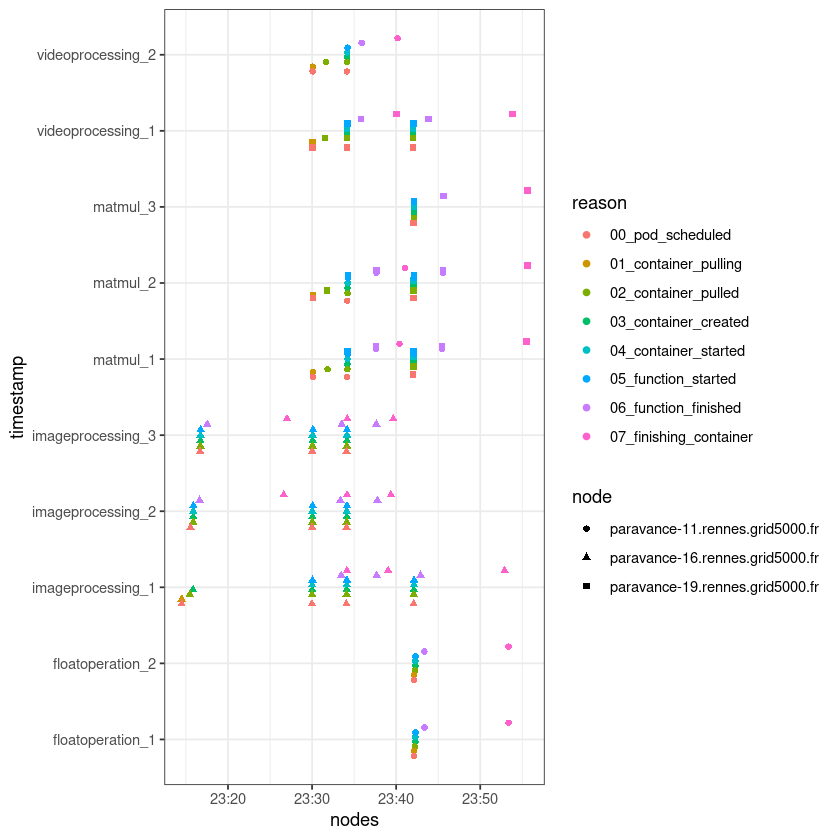

In [24]:
ggplot(data = df_plot, aes(x = timestamp, 
                           y = function_name, 
                           color = reason,
                           shape = node)) +
                           #group = function_name)) + #, color = node)) +
    #geom_line(size = 1, position = position_dodge(width = 0.5)) + 
    geom_point(position = position_dodge(width = 0.5)) +
    #coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
       theme(legend.position="right") +
       ggsave('full_line_plot_phases.png')

Saving 6.67 x 6.67 in image

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 8. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 137 rows containing missing values (geom_point).”
Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 8. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 137 rows containing missing values (geom_point).”


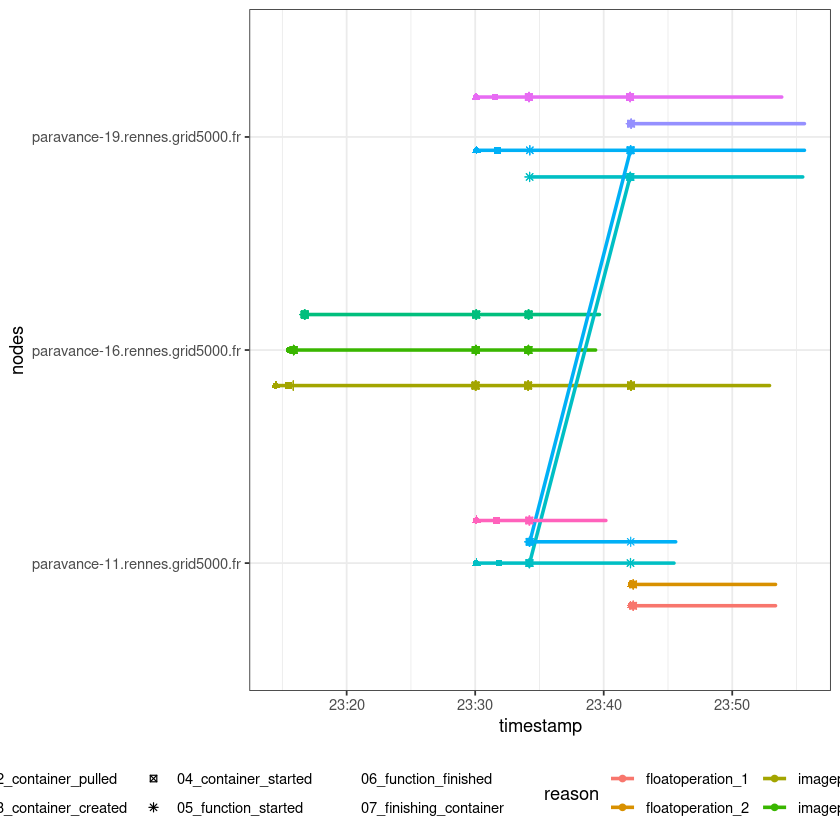

In [25]:
ggplot(data = df_plot, aes(x = node, 
                           y = timestamp, 
                           color = function_name,
                           shape = reason,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.5)) + 
    geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
       theme(legend.position="bottom") +
       ggsave('full_line_plot_phases.png')

Saving 6.67 x 6.67 in image



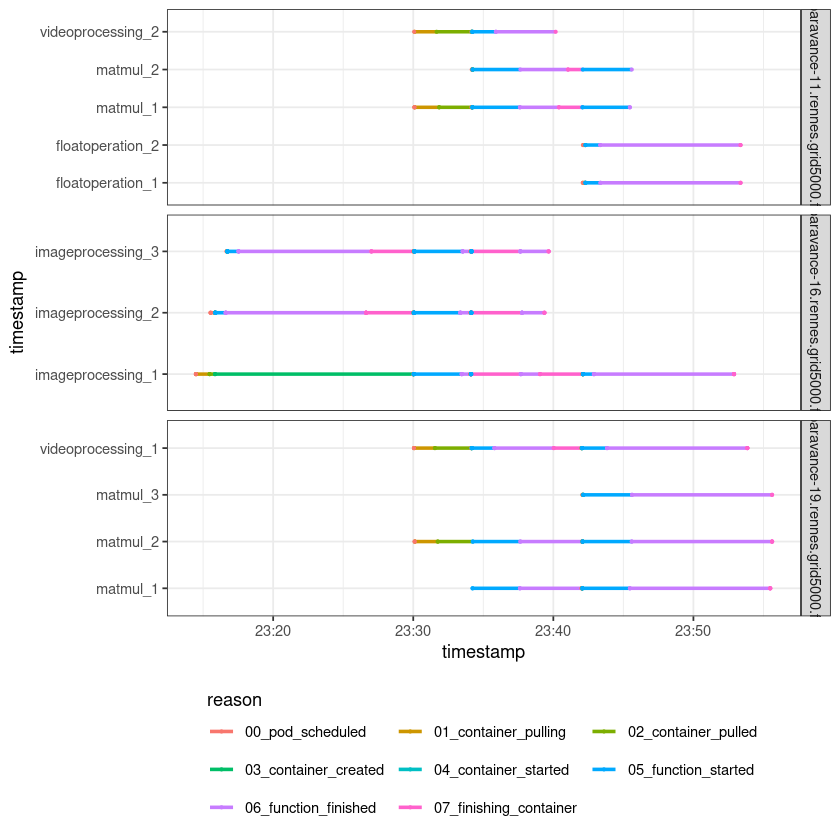

In [26]:
ggplot(data = df_plot, aes(x = timestamp, 
                           y = function_name, 
                           color = reason,
                          group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.7)) + 
    geom_point(size = 0.5, position = position_dodge(width = 0.7)) +
    facet_grid(node ~ ., scale="free_y") +
    labs(x = "timestamp", y = "timestamp", color = "reason") +
    scale_fill_brewer(palette = "Dark2") +
    theme_bw() +
    theme(legend.position="bottom") +
    guides(colour=guide_legend(nrow=3,byrow=TRUE, title.position = "top")) +
    ggsave('full_line_plot_phases.png')

In [27]:
a <- df_plot %>% filter(function_name == 'rnngenerate1' | function_name == 'rnngenerate2' |
                       function_name == 'rnngenerate3')
head(a)
tail(a)

function_name node reason timestamp

function_name node reason timestamp

Saving 6.67 x 6.67 in image



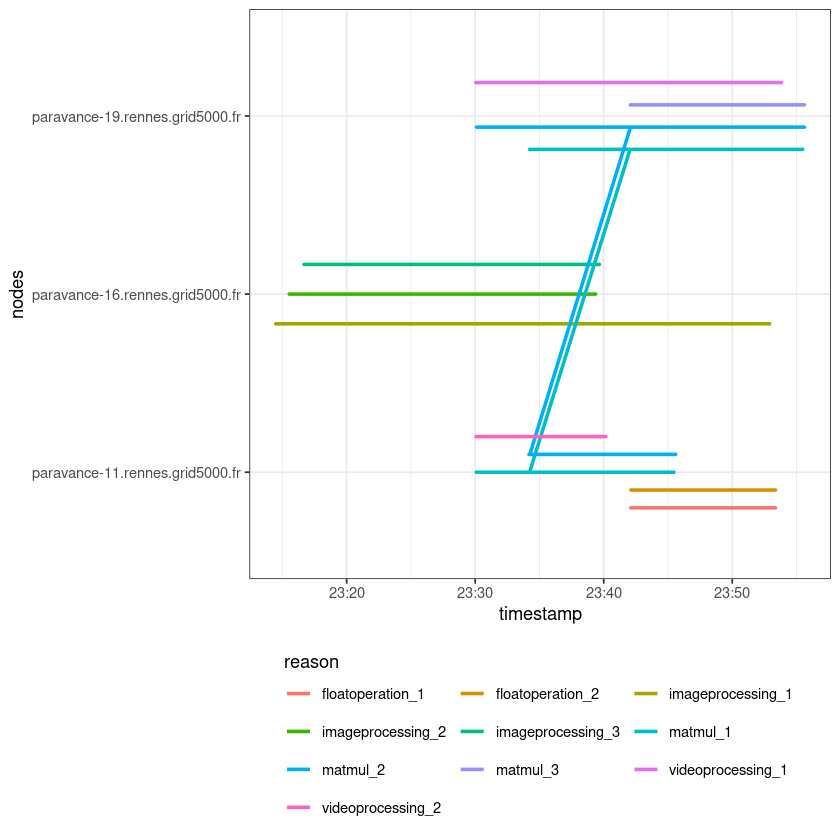

In [28]:
ggplot(data = df_plot, aes(x = node, 
                           y = timestamp, 
                           color = function_name,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.5)) + 
    #geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
       theme(legend.position="bottom") +
        guides(colour=guide_legend(ncol=3,byrow=TRUE, title.position = "top")) +
       ggsave('full_line_plot_without_phases.png')

In [29]:
#summary(df_plot)
df_plot2 <- df_plot %>% filter(reason == '05_function_started' | reason == '06_function_finished')
#summary(df_plot2)
ggplot(data = df_plot2, aes(x = node, 
                           y = timestamp, 
                           color = function_name,
       guides(colour = guide_legend(title.position = "right"))                    group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.3)) + 
    #geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
    theme(legend.position = "bottom") +
    guides(colour=guide_legend(nrow=6,byrow=TRUE, title.position = "top")) +
       ggsave('full_line_plot_functions_execution.png')

ERROR: Error in parse(text = x, srcfile = src): <text>:7:83: unexpected symbol
6:                            color = function_name,
7:        guides(colour = guide_legend(title.position = "right"))                    group
                                                                                     ^


In [ ]:
summary(df_plot)
df_plot2 <- df_plot %>% filter(reason == '04_container_started' | reason == '05_function_started')
summary(df_plot2)
ggplot(data = df_plot2, aes(x = node, 
                           y = timestamp, 
                           color = function_name,
                           shape = reason,
                           group = function_name)) + #, color = node)) +
    geom_line(size = 1, position = position_dodge(width = 0.5)) + 
    geom_point(position = position_dodge(width = 0.5)) +
    coord_flip() +
    labs(x = "nodes", y = "timestamp", color = "reason") +
       scale_fill_brewer(palette = "Dark2") +
       theme_bw() +
       theme(legend.position="bottom") +
       ggsave('full_line_plot2.png')

In [ ]:
a <- df_plot %>% filter(function_name == 'facedetection3')
print(a)